In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.spatial.distance import pdist, squareform
from scipy.spatial import distance_matrix
from itertools import permutations, combinations
from math import comb
import numpy as np
from timeit import default_timer as timer
import sys
sys.path.insert(0, '/home/kurk/curse/filtration/graph_func.cpython-312-x86_64-linux-gnu.so')

import netlibpp as gf
# import netlibpp_cpy as gf
import importlib
from timeit import default_timer as timer

from sklearn.neighbors import radius_neighbors_graph
import networkx as nx

hi


In [2]:
X = np.array([
    [0, 2.75], # 1
    [2, 2], # 2
    [3, 2.25], # 3
    [4, 4], #4
    [3.5, 0.75], #5
    [2.5, -0.25], #6
    [2.25, -2.25], #7
    [2.5, -4], #8
    [1, -3], #9
    [-1, -2.75], #10
    [-2.5, -1.0], #11
    [-4, 0.5], #12
    [-2, 1] #13
])

X = X + np.random.normal(0, 0.05, X.shape)
X

array([[ 0.02498796,  2.7889156 ],
       [ 1.97171339,  2.00965631],
       [ 2.97542215,  2.30351201],
       [ 4.00244519,  3.98703044],
       [ 3.4408782 ,  0.71548252],
       [ 2.50506949, -0.27845998],
       [ 2.24325887, -2.21158643],
       [ 2.45735921, -3.98880672],
       [ 1.03319154, -2.96804945],
       [-1.02045177, -2.763363  ],
       [-2.52261568, -0.95162345],
       [-4.05251114,  0.52777968],
       [-2.04782291,  0.97340102]])

In [3]:
# 2.50837060e+00, -2.62532814e-01
# -1.01151650e+00, -2.72741262e+00
# -2.01143606e+00,  1.06680525e+00

# [-0.0286061 ,  2.76648391],
# [-3.92639513,  0.47645805],
# [-2.06030554,  0.99912186]
A = radius_neighbors_graph(X, 4.25, mode='distance', include_self=False).toarray() #.astype(int)
G = nx.from_numpy_array(A)
A

array([[0.        , 2.09689888, 2.99009675, 4.15399148, 3.99592678,
        3.94456554, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 2.7554742 ],
       [2.09689888, 0.        , 1.04584055, 2.83441001, 1.95788944,
        2.3494563 , 4.22996776, 0.        , 0.        , 0.        ,
        0.        , 0.        , 4.15096339],
       [2.99009675, 1.04584055, 0.        , 1.97205746, 1.65483746,
        2.62446395, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [4.15399148, 2.83441001, 1.97205746, 0.        , 3.31939502,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.99592678, 1.95788944, 1.65483746, 3.31939502, 0.        ,
        1.3651592 , 3.16259778, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [3.94456554, 2.3494563 , 2.62446395, 0.        , 1.3651592 ,
        0.        , 1.95077

In [4]:
_A = distance_matrix(X, X)
dm = gf.get_VR_from_dist_matrix(_A, 2, 3)
# dm.creat(A, 3)
# dm.as_list()
dm.as_index_list()

[[[0], [11], [12], [10], [9], [1], [4], [7], [8], [3], [6], [2], [5]],
 [[12, 10],
  [4, 1],
  [4, 2],
  [7, 6],
  [8, 6],
  [8, 7],
  [3, 2],
  [6, 5],
  [2, 1],
  [5, 4]],
 [[4, 2, 1], [8, 7, 6]]]

In [5]:
def plot_core(G, K, msg):

    def stack(idx):
        ret = np.empty((0, 2))
        for _id in idx:
            ret = np.vstack((ret, X[_id,:]))
        return ret

    max_dim_K = len(K)

    plt.figure(figsize=(17,4))

    plt.subplot(1, 4, 1)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Neighborhood graph$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    for i in range(len(X)):
        plt.annotate(str(i), (X[i][0], X[i][1]))

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    plt.subplot(1, 4, 3)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title(msg)

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    # plot triangles
    if max_dim_K >= 3:
        for triangle in K[2]:
            t = plt.Polygon(stack(triangle), color="blue", alpha=0.15)
            plt.gca().add_patch(t)

    # plot tetrahedrons
    if max_dim_K >= 4:
        for tetra in K[3]:
            tt = plt.Polygon(stack(tetra), color="red", alpha=0.15)
            plt.gca().add_patch(tt)

    plt.show()

In [6]:
def plot_core_(G, K, msg):

    def stack(idx):
        ret = np.empty((0, 2))
        for _id in idx:
            ret = np.vstack((ret, X[_id,:]))
        return ret

    max_dim_K = len(K)

    plt.figure(figsize=(17,4))

    plt.subplot(1, 4, 1)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title("Neighborhood graph$")

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    for i in range(len(X)):
        plt.annotate(str(i), (X[i][0], X[i][1]))

    # plot edges
    for e in G.edges():
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    plt.subplot(1, 4, 3)
    plt.xlim((-5, 5))
    plt.ylim((-5, 5))
    plt.grid(linestyle="dotted")
    plt.title(msg)

    # plot vertices
    plt.scatter(X[:,0], X[:,1])

    for e in K[1]:
        (start_id, end_id) = e
        plt.plot([X[start_id,0], X[end_id,0]], [X[start_id,1], X[end_id,1]], 'c-', alpha=0.5)

    # plot triangles
    if max_dim_K >= 3:
        for triangle in K[2]:
            t = plt.Polygon(stack(triangle), color="blue", alpha=0.15)
            plt.gca().add_patch(t)

    # plot tetrahedrons
    if max_dim_K >= 4:
        for tetra in K[3]:
            tt = plt.Polygon(stack(tetra), color="red", alpha=0.15)
            plt.gca().add_patch(tt)

    plt.show()

In [7]:
epsilons = list(np.sort(A[np.tril(A).nonzero()]))
epsilons

[np.float64(1.0458405465505014),
 np.float64(1.3651591973856476),
 np.float64(1.4270596451854556),
 np.float64(1.65483745577231),
 np.float64(1.7521983231491922),
 np.float64(1.7900700845359334),
 np.float64(1.950774892204633),
 np.float64(1.95788943589528),
 np.float64(1.9720574580591412),
 np.float64(1.9827121305874176),
 np.float64(2.053619559778899),
 np.float64(2.0638186417267765),
 np.float64(2.0968988833854945),
 np.float64(2.1281949469209853),
 np.float64(2.3494562997690576),
 np.float64(2.353486055047094),
 np.float64(2.624463946035159),
 np.float64(2.755474202294965),
 np.float64(2.834410006509352),
 np.float64(2.990096745814488),
 np.float64(3.065993507201843),
 np.float64(3.1625977784401784),
 np.float64(3.3100248509418644),
 np.float64(3.3193950170170092),
 np.float64(3.687394950399121),
 np.float64(3.7106534736991152),
 np.float64(3.875422141926274),
 np.float64(3.944565542347331),
 np.float64(3.9959267810960433),
 np.float64(4.087754738870736),
 np.float64(4.150963392763

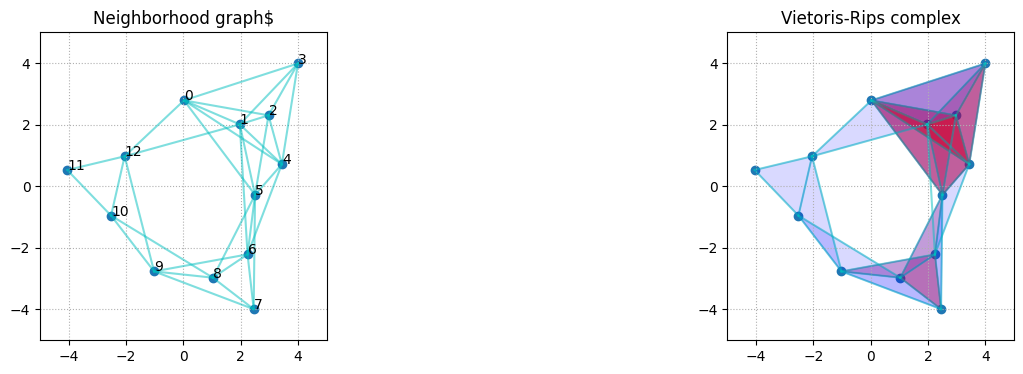

2


2.0968988833854945

In [8]:
_A = radius_neighbors_graph(X, epsilons[len(epsilons) - 1], mode='distance', include_self=False).toarray()
__A = distance_matrix(X, X)
__K = gf.get_VR_from_dist_matrix(__A, epsilons[len(epsilons) - 1], 4)
_K =  __K.as_index_list()
plot_core(nx.from_numpy_array(_A), _K, "Vietoris-Rips complex")
print(__K.filtration(2)[5].dim())
__K.filtration(1)[5].get_volume()

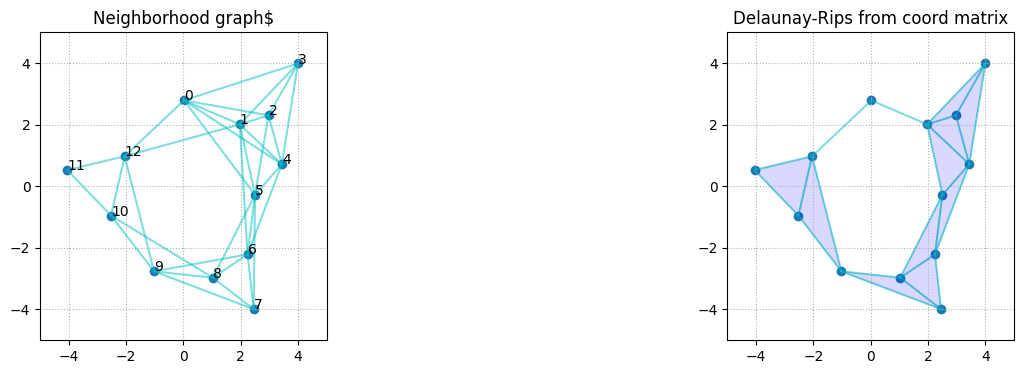

[[[7], [8], [0], [3], [6], [5], [4], [11], [10], [2], [1], [12], [9]],
 [[7, 9],
  [7, 8],
  [8, 9],
  [0, 12],
  [0, 1],
  [3, 4],
  [6, 8],
  [6, 7],
  [5, 8],
  [5, 6],
  [4, 6],
  [4, 5],
  [10, 12],
  [10, 11],
  [11, 12],
  [2, 4],
  [2, 3],
  [1, 5],
  [1, 4],
  [1, 3],
  [1, 2],
  [9, 12],
  [9, 10]],
 [[7, 8, 9],
  [5, 6, 8],
  [6, 7, 8],
  [4, 5, 6],
  [10, 11, 12],
  [2, 3, 4],
  [1, 4, 5],
  [1, 2, 4],
  [1, 2, 3],
  [9, 10, 12]]]

In [9]:
__K = gf.get_DelaunayRips_from_coord_matrix(X, 4.0)
_K =  __K.as_index_list()
plot_core_(nx.from_numpy_array(_A), _K, "Delaunay-Rips from coord matrix")
_K

In [10]:
__K = gf.get_Alpha_from_coord_matrix(X, 1.6)
_K =  __K.as_index_list()
_K

[[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]],
 [[0, 1],
  [0, 12],
  [1, 2],
  [1, 3],
  [1, 4],
  [1, 5],
  [2, 3],
  [2, 4],
  [4, 5],
  [4, 6],
  [5, 6],
  [5, 8],
  [6, 7],
  [6, 8],
  [7, 8],
  [8, 9],
  [9, 10],
  [10, 11],
  [10, 12],
  [11, 12]],
 [[1, 2, 4], [1, 4, 5], [6, 7, 8], [10, 11, 12]]]

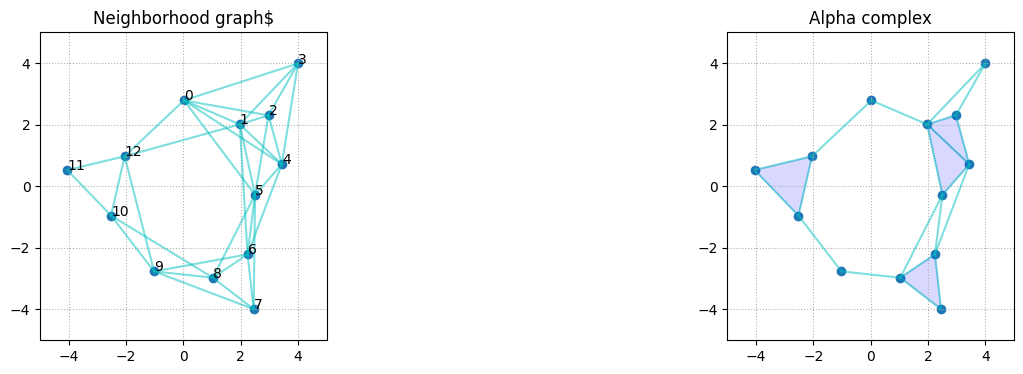

In [11]:
plot_core_(nx.from_numpy_array(_A), _K, "Alpha complex")

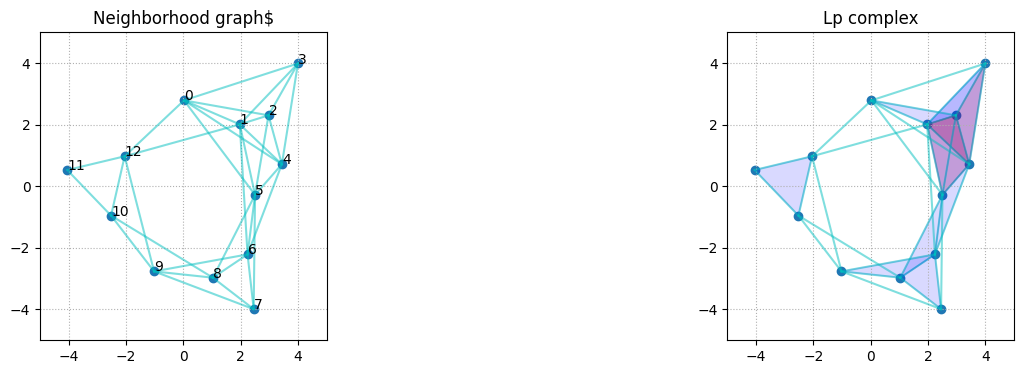

[[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12]],
 [[0, 1],
  [0, 2],
  [0, 12],
  [1, 2],
  [1, 3],
  [1, 4],
  [1, 5],
  [2, 3],
  [2, 4],
  [2, 5],
  [3, 4],
  [4, 5],
  [4, 6],
  [5, 6],
  [5, 8],
  [6, 7],
  [6, 8],
  [6, 9],
  [7, 8]],
 [[0, 1, 2],
  [1, 2, 3],
  [1, 2, 4],
  [1, 2, 5],
  [1, 3, 4],
  [1, 4, 5],
  [2, 4, 5],
  [2, 3, 4],
  [4, 5, 6],
  [5, 6, 8],
  [6, 7, 8],
  [6, 8, 9],
  [10, 11, 12]],
 [[1, 2, 3, 4], [1, 2, 4, 5]]]

In [12]:
__K = gf.get_Lp_from_coord_matrix(X, 3.5, 2, 4)
_K =  __K.as_index_list()
plot_core(nx.from_numpy_array(_A), _K, "Lp complex")
__K.as_index_list()

In [13]:
point = gf.Point(np.array([0, 0]).astype(np.float64))
pr = __K.projection(point)
for i in pr:
    print(i.coords())
print(pr)

[-1.3714516062674367, 1.5658149104464791]
{<netlibpp_cpy.Point_double object at 0x7c14b08f0eb0>}


In [14]:
__K.laplace_matrix(0)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0.],
       [0., 3., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 3.,
        1., 0., 2.],
       [0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 1.],
       [0., 1., 1., 2., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 2.,
        1., 0., 1.],
       [0., 2., 1., 1., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
        2., 0., 2.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 2., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 1., 2., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 2., 1., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 0., 1., 1., 0., 0.

In [15]:
l = __K.as_list()
__K.simplex_from_indexes(l[2][0]).get_volume()
print(__K.boundary_matrix(1).shape, __K.boundary_matrix(2).shape)
__K.laplace_matrix(1)

(19, 13) (13, 2)


array([[3., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 7., 0., 1., 3., 0., 5., 1., 0., 2., 1., 1.],
       [1., 0., 0., 3., 0., 0., 0., 0., 1., 0., 0., 1., 0.],
       [0., 0., 1., 0., 4., 2., 0., 2., 1., 1., 0., 1., 1.],
       [0., 0., 3., 0., 2., 5., 0., 3., 1., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 1., 0.],
       [0., 0., 5., 0., 2., 3., 0., 6., 1., 0., 2., 1., 2.],
       [0., 0., 1., 1., 1., 1., 0., 1., 2., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 2., 0., 0., 0.],
       [0., 0., 2., 0., 0., 1., 0., 2., 0., 0., 2., 0., 0.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 4., 0.],
       [0., 0., 1., 0., 1., 1., 0., 2., 0., 0., 0., 0., 2.]])

In [16]:
__K.weighted_laplace_matrix(1)

array([[2.09689888, 2.99009675, 2.7554742 , 1.04584055, 2.83441001,
        1.95788944, 2.3494563 , 1.97205746, 1.65483746, 2.62446395,
        3.31939502, 1.3651592 , 3.16259778, 1.95077489, 3.06599351,
        1.79007008, 1.42705965, 3.31002485, 1.75219832]])

In [17]:
print(__K.as_simplex_list()[1][1].get_coords(), __K.as_simplex_list()[1][1].get_volume())

[[0.024987961957816992, 2.7889155950298448], [6.3665011721e-313, 7.515e-321]] 2.990096745814488


In [18]:
__K = 0

ttt = np.array([[0, 0], [2, 0], [1, 3 ** 0.5], [1, 3 ** 0.5 + 1]])

min_dist = 2.85

__K = gf.get_Lp_from_coord_matrix(ttt, min_dist, 2, 4)
__V = gf.get_VR_from_coord_matrix(ttt, min_dist, 4)
print(__K.as_index_list())
print(__V.as_index_list())
type(__V)

[[[0], [1], [2], [3]], [[0, 1], [0, 2], [1, 2], [2, 3]], [[0, 1, 2]]]
[[[3], [2], [1], [0]], [[3, 2], [1, 0], [2, 0], [2, 1]], [[2, 1, 0]]]


netlibpp_cpy.VRComplexFromCoordMatrix_double

In [26]:
# __K = 0

for epsilon in epsilons:
    _A = radius_neighbors_graph(X, epsilon, mode='distance', include_self=False).toarray() #.astype(int)

    _G = nx.from_numpy_array(_A)

    _M = _A.copy()
    np.fill_diagonal(_M, 1)

    _A = _A.astype(np.float32)
    __K = gf.get_VR_from_coord_matrix(X, epsilon, 4)
    _K =  __K.as_index_list()
    # plot_core(_G, _K, "Vietors-Rips complex")

In [27]:
__K = 0

for epsilon in epsilons:
    _A = radius_neighbors_graph(X, epsilon, mode='distance', include_self=False).toarray() #.astype(int)

    _G = nx.from_numpy_array(_A)

    __K = gf.get_Lp_from_coord_matrix(X, epsilon, 2, 4)
    _K =  __K.as_index_list()
    # plot_core(_G, _K, "Lp complex")